In [1]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

<h1>Assignment 2: Life Expectancy and You!</h1>

<b>Instructions:</b>
<ul>
<li>Use the worksheet below to act as a guide to exploring and examining the data in the dataset.
<li>Try to make things easy to read. Look at the formatting stuff above. 
<li>As long as you do what is asked, you can do things in many different ways. You may need to do a little searching. 
</ul>

### Please Use Formatting to Make it Clear What I Should be Looking at! Please!!! I Beg You!!!

In [2]:
#Load data and do some cleanup before starting
#Please don't change this stuff. 
dfLE = pd.read_csv("led.csv")
dfLE.rename(columns={"Status":"isDeveloped", }, inplace=True)
dfLE["isDeveloped"].replace(('Developed', 'Developing'), (1, 0), inplace=True) # recoding
dfLE = dfLE.drop(columns={"Year", "Incomecompositionofresources", "thinness5-9years", "HIV/AIDS", "percentageexpenditure", "Totalexpenditure", "thinness1-19years"})
dfLE = dfLE.groupby("Country", as_index=False).mean()
dfLE.head()


,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.3750,52.3125,4.136734e+09,9.972260e+06,8.21250
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.1250,98.0625,1.166938e+09,6.969116e+05,12.13750
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.7500,91.8750,7.345597e+10,2.164983e+07,12.71250
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.1250,47.6875,2.177835e+10,1.014710e+07,8.04375
4,AntiguaandBarbuda,0.0,75.05625,127.5000,0.0000,7.949333,98.266667,0.0000,38.42500,0.0000,96.9375,98.3125,0.000000e+00,NaN,8.84375


<h2>Part 1: Add a column for GDP per Capita (5pts)</h2>

Show print the labels along with just that column. Print 10 random rows of that data. 

Note: you'll have to look at the units to ensure you get it right. 

In [3]:
#Part 1

dfLE['GDP_per_capita'] = round(dfLE['GDP']/dfLE['Population'],2)


In [4]:
dfLE.sample(n=10) # Print 10 random rows of that data. 

,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDP_per_capita
59,Finland,0.0,80.71250,68.8750,0.0000,9.552667,NaN,2.8125,52.30000,0.0000,97.187500,98.250000,7.505123e+10,3.493082e+06,17.29375,21485.67
38,CookIslands,0.0,NaN,NaN,0.0000,0.010000,98.000000,0.0000,82.80000,0.0000,98.000000,98.000000,0.000000e+00,NaN,NaN,NaN
76,India,0.0,65.41875,146.5625,1366.6875,1.942000,35.000000,46454.1875,14.79375,1812.5000,69.625000,67.062500,2.917192e+11,4.214677e+08,9.98125,692.15
117,Nepal,0.0,66.48125,147.2500,29.1250,0.190000,65.384615,4663.5625,15.17500,38.1250,69.125000,73.687500,6.466942e+09,1.463376e+07,10.43125,441.92
9,Azerbaijan,0.0,70.73125,115.1875,6.0625,0.992000,59.214286,598.1875,43.84375,7.1875,75.812500,82.312500,6.669684e+09,2.157370e+06,11.35000,3091.58
178,Ukraine,0.0,69.93750,205.7500,5.0625,7.369333,54.625000,5395.1875,50.89375,5.9375,81.437500,70.000000,4.164713e+09,1.000493e+07,14.60625,416.27
81,Israel,0.0,81.30000,59.5000,0.9375,2.497333,97.437500,138.9375,54.98750,1.0000,94.250000,89.000000,6.559575e+08,2.786288e+04,15.71250,23542.35
129,PapuaNewGuinea,0.0,61.68125,266.5625,10.6250,0.580667,57.000000,2349.8750,40.78750,13.7500,62.562500,68.375000,3.610450e+09,4.813446e+06,8.54375,750.08
10,Bahamas,0.0,74.28750,152.0625,0.0000,10.271333,83.600000,0.0000,52.88125,0.0000,95.000000,95.750000,0.000000e+00,NaN,12.42500,NaN
170,Timor-Leste,0.0,64.75625,170.3750,2.3750,0.235333,76.000000,85.0625,14.55000,3.0000,63.214286,64.214286,1.829199e+08,4.601956e+05,10.70000,397.48


Note: I will perform all major data transformation in part 1. 

In [5]:
# The data has some missing values.
# count of null values in each column. I will show columnms with missing values
print(dfLE.isnull().sum())

Country              0
isDeveloped          0
Lifeexpectancy       8
AdultMortality       8
infantdeaths         0
Alcohol              2
HepatitisB           9
Measles              0
BMI                  4
under-fivedeaths     0
Polio                0
Diphtheria           0
GDP                  0
Population          47
Schooling           13
GDP_per_capita      47
dtype: int64


In [6]:
nan_in_col  = dfLE[dfLE['GDP_per_capita'].isnull()]
nan_in_col = nan_in_col[['Country','GDP_per_capita','GDP', 'Population']]
nan_in_col

,Country,GDP_per_capita,GDP,Population
4,AntiguaandBarbuda,NaN,0.0,NaN
10,Bahamas,NaN,0.0,NaN
11,Bahrain,NaN,0.0,NaN
13,Barbados,NaN,0.0,NaN
19,Bolivia(PlurinationalStateof),NaN,0.0,NaN
23,BruneiDarussalam,NaN,0.0,NaN
37,Congo,NaN,0.0,NaN
38,CookIslands,NaN,0.0,NaN
41,Cuba,NaN,0.0,NaN
43,Czechia,NaN,0.0,NaN


In [7]:
# I create and  visualize the newly created cloumns before doing further analysis
df = dfLE.sort_values(by = 'GDP_per_capita', ascending=False) 
df = df.set_index('Country') # setting column Country as index to make the plot comprehensive

In [8]:
df.sample() # shows one random row. County has been set as index

,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDP_per_capita
Country,,,,,,,,,,,,,,,
Brazil,0.0,73.38125,150.6875,68.25,7.213333,96.1875,95.375,47.0625,77.25,98.3125,97.9375,5.241280e+11,88128071.25,14.1625,5947.34


In [9]:
# Slice the data into two based on the value of "isDeveloped"
# 0 - developing countries
# 1 - developed  countries

df1= df[df['isDeveloped']==0]
df2 = df[df['isDeveloped']==1]

In [10]:
df2.tail(10) # shows missing values fo GDP per Capita and the lowest values of developed countries

,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDP_per_capita
Country,,,,,,,,,,,,,,,
Slovenia,1.0,79.73125,76.4375,0.0000,10.754667,NaN,6.0625,52.20000,0.0000,95.1875,95.0000,2.480334e+09,4.012791e+05,16.47500,6181.07
Bulgaria,1.0,72.85000,125.5000,0.9375,10.865333,94.500000,1530.3125,54.50000,1.0000,94.2500,94.0000,2.904991e+10,5.290924e+06,13.72500,5490.52
Romania,1.0,74.05000,156.0625,2.8125,8.968667,91.812500,1365.6875,52.25000,3.2500,94.7500,95.0000,4.443344e+10,9.206346e+06,13.92500,4826.39
Poland,1.0,75.65000,107.5625,2.2500,9.998667,97.375000,47.4375,53.73125,2.6875,96.7500,98.7500,7.739083e+10,1.605325e+07,15.25000,4820.88
Czechia,1.0,76.76875,71.8125,0.0000,13.026000,97.285714,22.9375,55.71250,0.0000,98.0000,98.1250,0.000000e+00,NaN,NaN,NaN
NewZealand,1.0,81.33750,71.5000,0.0000,9.166250,70.187500,94.9375,56.62500,0.0000,89.1250,70.6250,0.000000e+00,NaN,18.86875,NaN
Singapore,1.0,81.47500,62.0000,0.0000,1.762500,95.875000,85.7500,25.90625,0.0000,96.1250,96.1875,0.000000e+00,NaN,13.98125,NaN
Slovakia,1.0,74.75000,118.0625,0.0000,10.473333,98.562500,0.2500,51.81875,0.1250,98.4375,98.6250,0.000000e+00,NaN,14.35000,NaN
UnitedKingdomofGreatBritainandNorthernIreland,1.0,80.79375,70.3750,3.6250,11.131250,NaN,715.7500,55.38750,4.0625,92.8750,92.8750,0.000000e+00,NaN,NaN,NaN


Text(0.5, 25.0, 'GDP Per Capita')

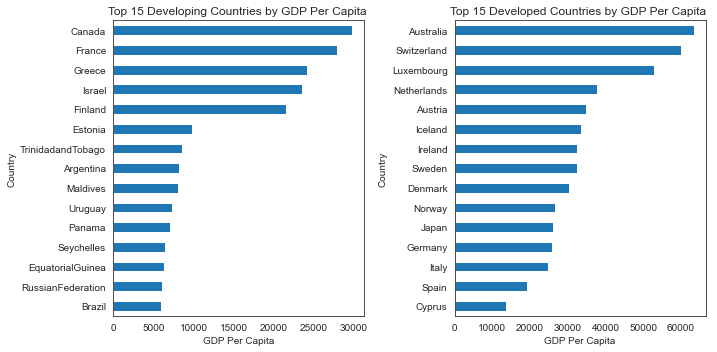

In [11]:
sns.set_style('white')

plt.subplot(1, 2, 1)
df1.GDP_per_capita.iloc[14::-1,].plot(
    kind='barh', figsize=(10, 5),
    title='Top 15 Developing Countries by GDP Per Capita '
)
plt.xlabel('GDP Per Capita')


plt.subplot(1, 2, 2)

df2.GDP_per_capita.iloc[14::-1,].plot(
    kind='barh', figsize=(10, 5),
    title='Top 15 Developed Countries by GDP Per Capita '
)

# space between the plots
plt.tight_layout()

plt.xlabel('GDP Per Capita')


<b>Some Questions:</b>
<ul>
<li> Is Canada, France, Greece, Isreal, Finland or Estonia a developing country? Answer from research is No. They are coded 0 under variable 'isDeveloped'.
<li> Should I remove these countries and place them into developed countries? Answer is YES!
</ul>

I have closely observerd that Canada, France,Finland, Greece and Isreal were wrongly classified as developing countries. The GDP per capita of these countries is well above 20,000 USD and since no developing country has up to 20,000. I will use 20,000 USD to create the cutoff from developing to developed. I will also place Estonia as developed country according to UN report.

In [12]:

dfLE.loc[(dfLE.GDP_per_capita >= 20000) , 'isDeveloped'] = 1  # regrouping Canada, France,Finland, Greece and Isreal as developed countries
dfLE.loc[(dfLE.Country == "Estonia") ,'isDeveloped'] = 1 # place Estonia as part of developed countries

df = dfLE.sort_values(by = 'GDP_per_capita', ascending=False) 
df = df.set_index('Country') # setting column Country as index

df1= df[df['isDeveloped'].dropna()==0]  # isDeveloped == 0 (Developing Countries)
df2 = df[df['isDeveloped'].dropna()==1] # isDeveloped == 1 (Developed Countries)

Text(0.5, 25.0, 'GDP Per Capita')

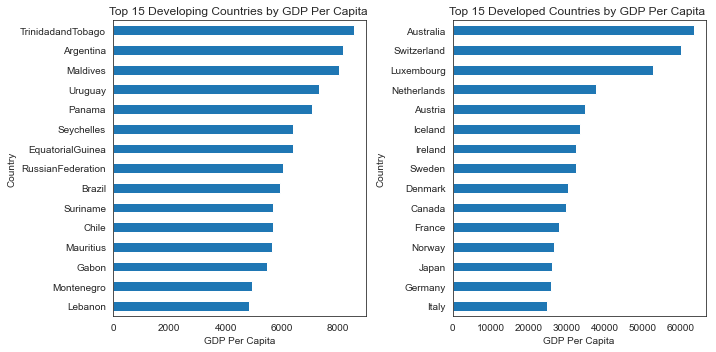

In [13]:
sns.set_style('white')

plt.subplot(1, 2, 1)
df1.GDP_per_capita.iloc[14::-1,].plot(
    kind='barh', figsize=(10, 5),
    title='Top 15 Developing Countries by GDP Per Capita '
)
plt.xlabel('GDP Per Capita')


plt.subplot(1, 2, 2)

df2.GDP_per_capita.iloc[14::-1,].plot(
    kind='barh', figsize=(10, 5),
    title='Top 15 Developed Countries by GDP Per Capita '
)

# space between the plots
plt.tight_layout()

plt.xlabel('GDP Per Capita')

In [14]:
df2.dropna().tail(5)

,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDP_per_capita
Country,,,,,,,,,,,,,,,
Estonia,1.0,74.94375,169.6875,0.0000,9.014667,86.833333,3.5000,56.68125,0.0000,94.25,94.1250,7.794473e+09,7.918487e+05,15.9375,9843.39
Belgium,1.0,80.68125,70.1875,0.2500,11.042667,74.500000,81.5625,50.89375,1.0000,97.75,97.3125,2.276441e+10,2.884043e+06,16.7875,7893.23
Bulgaria,1.0,72.85000,125.5000,0.9375,10.865333,94.500000,1530.3125,54.50000,1.0000,94.25,94.0000,2.904991e+10,5.290924e+06,13.7250,5490.52
Romania,1.0,74.05000,156.0625,2.8125,8.968667,91.812500,1365.6875,52.25000,3.2500,94.75,95.0000,4.443344e+10,9.206346e+06,13.9250,4826.39
Poland,1.0,75.65000,107.5625,2.2500,9.998667,97.375000,47.4375,53.73125,2.6875,96.75,98.7500,7.739083e+10,1.605325e+07,15.2500,4820.88


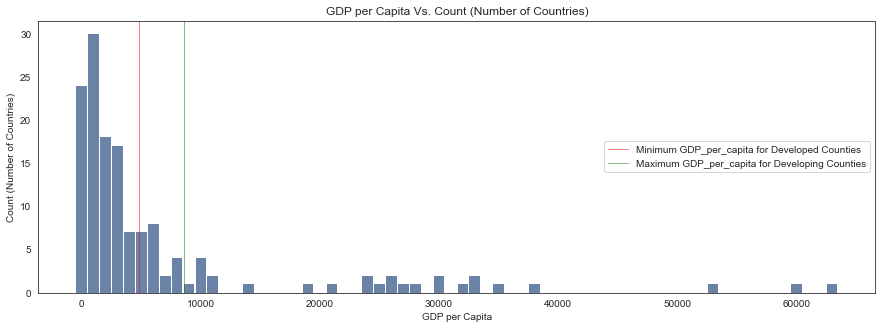

In [15]:
# Hist of GDP per Capita for Developing and Developed Countries shows that there is high difference in standard of living between
# developed and developing countries.
# All developing countries clustered below 8,000 USD as GDP oer Capita
# Also, for the developed countries the gap is wide from country to country from 10,000 USD upward.
# 
# Print Histogram of GDP per Capita for the data 
gdppc = pd.Series(df['GDP_per_capita']).dropna()
gdppc = thinkstats2.Hist(round(gdppc,-3))
thinkplot.Hist(gdppc)
thinkplot.axvline(min(df2.dropna().GDP_per_capita), color="Red",
 label="Minimum GDP_per_capita for Developed Counties")
thinkplot.axvline(max(df1.dropna().GDP_per_capita), color="Green", label="Maximum GDP_per_capita for Developing Counties")
thinkplot.Config(title="GDP per Capita Vs. Count (Number of Countries)",
    xlabel="GDP per Capita",
    ylabel="Count (Number of Countries)", 
    loc="center right",)

# I think the data could be futher grouped but I did not do it in this assignment.
# df2.dropna().tail(5) shows the least 5 countries with lower GDP per Capita for developed countries

# Countries like Poland, Romania, Bulgaria and Belgium fall behind the green line 
# ( Maximum GDP per Capita Income of a developing county) 
# The empty bar is the disparity among developed countries in terms of GDP per Capita

Data looks good for further analysis

### Part 2: Print a visualization of each distribution. Both regular (density) and cumulative. (15pts)

Print each distribution is some type of visualization, also print the cumulative distribution. 
<ul>
<li>5 points are for using some visualization that is effective.
<li>5 points for formatting things in a nice layout. Hint: for whatever chart you use, look into some formatting options. Think of what to try to Google for an example for printing multiple charts, a grid of charts, etc... and try to adapt one to yours. There is also a way to do it using some thinkstats/thinkplot stuff. 
<li><b>5 points are for doing it in an efficient way - just listing off each column is lots of typing... Remember, the #1 trait of programmers is laziness with respect to repetitive tasks. If we are doing the same thing over and over with tiny changes, try to think of a condensed way to do this...</b>
</ul>

In [16]:
#Print all distributions

array([[<AxesSubplot:title={'center':'Lifeexpectancy'}>,
        <AxesSubplot:title={'center':'AdultMortality'}>,
        <AxesSubplot:title={'center':'infantdeaths'}>,
        <AxesSubplot:title={'center':'Alcohol'}>],
       [<AxesSubplot:title={'center':'HepatitisB'}>,
        <AxesSubplot:title={'center':'Measles'}>,
        <AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'under-fivedeaths'}>],
       [<AxesSubplot:title={'center':'Polio'}>,
        <AxesSubplot:title={'center':'Diphtheria'}>,
        <AxesSubplot:title={'center':'GDP'}>,
        <AxesSubplot:title={'center':'Population'}>],
       [<AxesSubplot:title={'center':'Schooling'}>,
        <AxesSubplot:title={'center':'GDP_per_capita'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

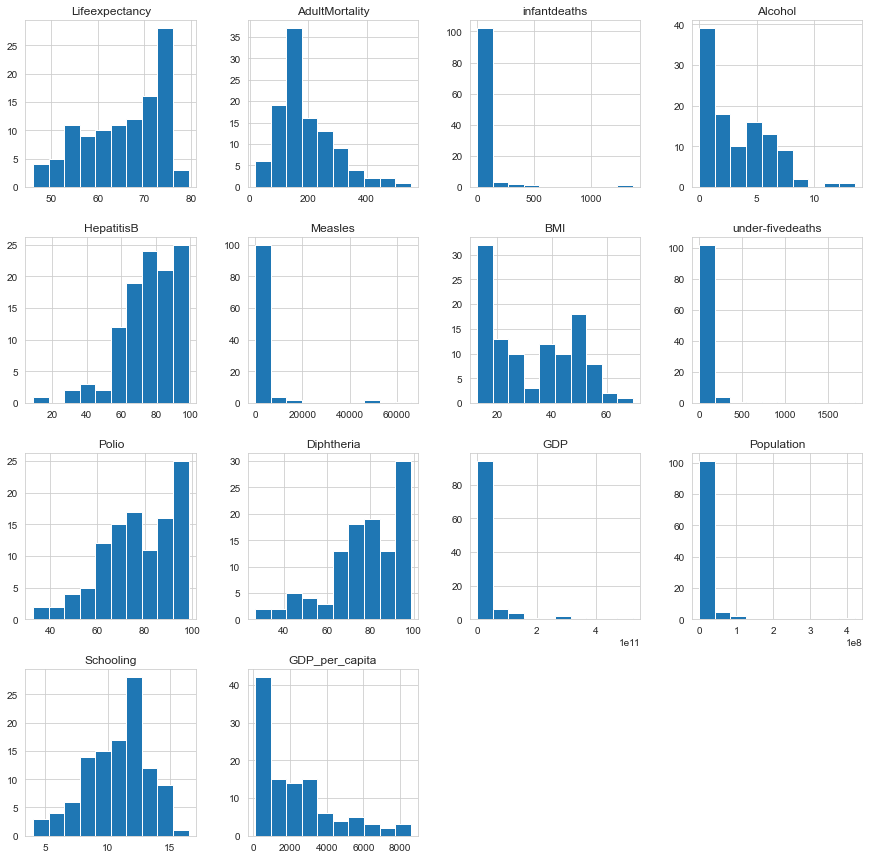

In [17]:
sns.set_style('whitegrid')

# plot all columns in df1 ( Developing Countries)
df1.dropna().drop(columns="isDeveloped").hist(figsize=(15,15),bins=10)



array([[<AxesSubplot:title={'center':'Lifeexpectancy'}>,
        <AxesSubplot:title={'center':'AdultMortality'}>,
        <AxesSubplot:title={'center':'infantdeaths'}>,
        <AxesSubplot:title={'center':'Alcohol'}>],
       [<AxesSubplot:title={'center':'HepatitisB'}>,
        <AxesSubplot:title={'center':'Measles'}>,
        <AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'under-fivedeaths'}>],
       [<AxesSubplot:title={'center':'Polio'}>,
        <AxesSubplot:title={'center':'Diphtheria'}>,
        <AxesSubplot:title={'center':'GDP'}>,
        <AxesSubplot:title={'center':'Population'}>],
       [<AxesSubplot:title={'center':'Schooling'}>,
        <AxesSubplot:title={'center':'GDP_per_capita'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

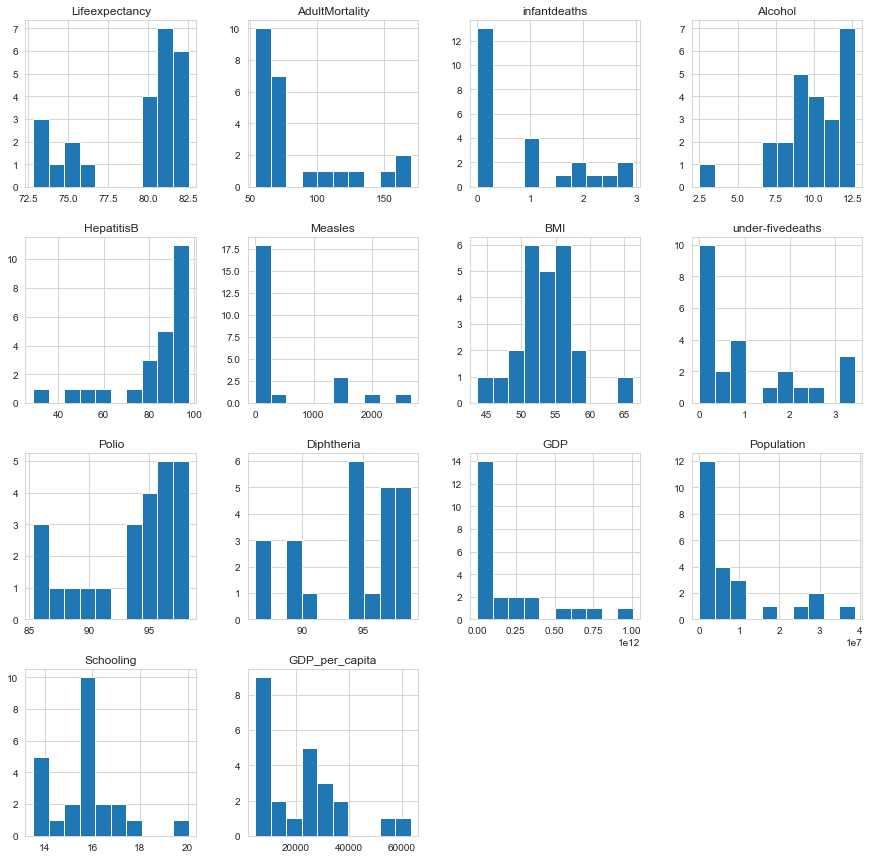

In [18]:
# plot all columns in df1 ( Developing Countries)
df2.dropna().drop(columns="isDeveloped").hist(figsize=(15,15),bins=10)

### Create an analytical distribution for SCHOOLING, and use it for a couple of things. (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing the distribution. Do it <b>without</b> using a fit() method. Plot the emperical data on the same graph as the analytical distribution. 
<li>5 points are for using the distribution to predict the percentage of that have a schooling level within 1 year of Canada. 
</ul>

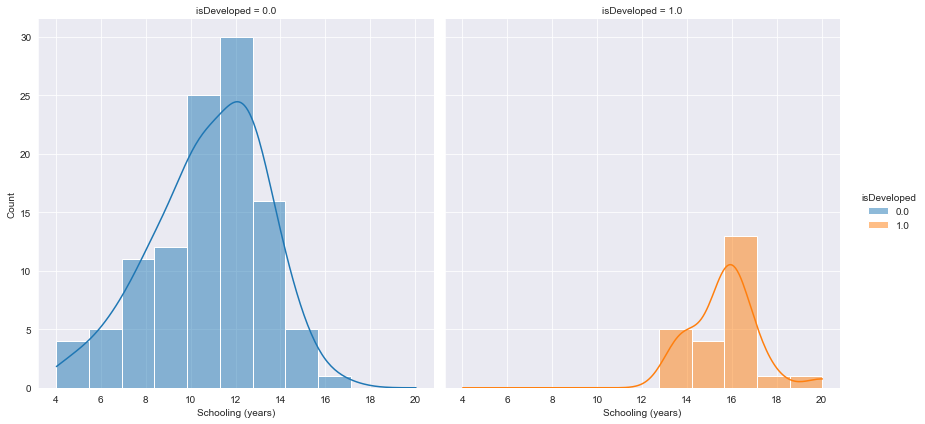

In [19]:
sns.set_style('darkgrid')


#Schooling in years across group (Developed= 1.0 and Developing = 0.0)

plot = sns.displot(data=df.dropna(), x='Schooling', kde=True, hue='isDeveloped', col='isDeveloped', height=6, aspect=1)
sns.despine()


#Set Axis Labels
plot.set_axis_labels("Schooling (years)", "Count")

In [20]:
df1.Schooling.dropna().mean(), df2.Schooling.dropna().mean()

(11.082255244755245, 15.890714285714287)

In [21]:
# plot different groups showed that average schooling in years for developing countries and developed countries. 
# I will check the difference in means using the cohen effectsize

def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d


In [22]:
CohenEffectSize(df2.Schooling.dropna(), df1.Schooling.dropna())

1.965477761879425

In [23]:
# Cohen’s Effectsize The average schooling of 'Developed Countries' df2 is 1.9654 
# standard deviations greater than the average of 'Developing Countries'  df1.

# Using the rule of thumb interpretation, I would interpret this to be a large effect size.

# In other words, there is a statistically significant difference in the mean Schooling between groups, 
# the actual difference between the group means is large.

In [24]:
# For this assignment, I will continue to look at the df.Schooling as single variable

In [25]:
mu_sch = df.Schooling.dropna().mean()
med_sch = df.Schooling.dropna().median()

In [26]:
#Hist
histSch = thinkstats2.Hist(round((df.Schooling).dropna(),0))
pmfSch = thinkstats2.Pmf(round((df.Schooling).dropna(),0))
cdf_sc = thinkstats2.Cdf((df.Schooling).dropna())
pdf_sch = thinkstats2.EstimatedPdf((df.Schooling).dropna())




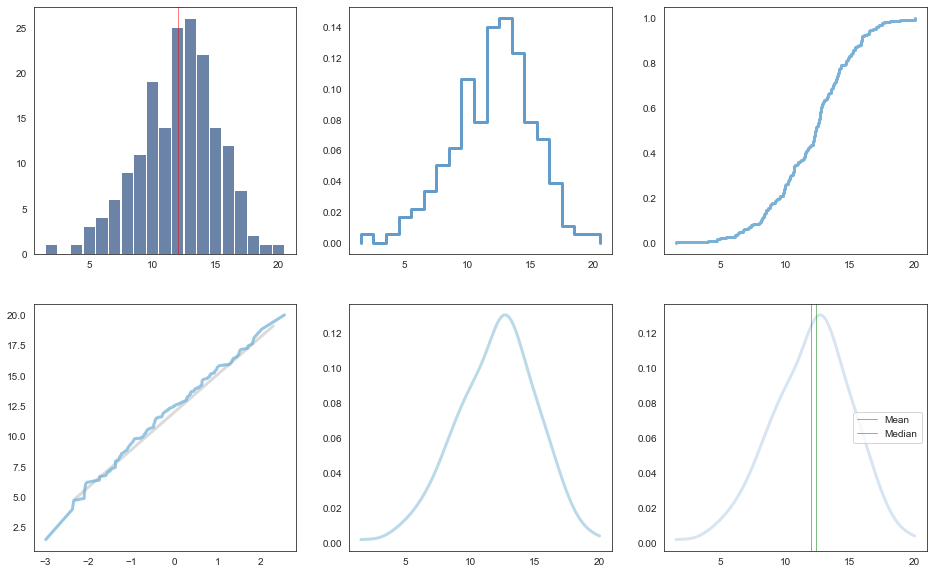

In [27]:
sns.set_style('white')
#Create graphs
thinkplot.PrePlot(6, rows =2, cols=3)
thinkplot.Hist(histSch)
thinkplot.axvline(mu_sch, color="red")
thinkplot.SubPlot(2)
thinkplot.Pmf(pmfSch)
thinkplot.SubPlot(3)
thinkplot.Cdf(cdf_sc)
thinkplot.SubPlot(4)
thinkstats2.NormalProbabilityPlot((df.Schooling).dropna())
thinkplot.SubPlot(5)
thinkplot.Pdf(pdf_sch)
thinkplot.SubPlot(6)
thinkplot.Pdf(pdf_sch)
thinkplot.axvline(mu_sch, color="Red", label="Mean")
thinkplot.axvline(med_sch, color="Green", label="Median")
thinkplot.Config()

In [28]:
sch =df.Schooling.dropna()

In [29]:
#Analytical for Schooling

In [30]:
def MakeNormalModel(sch):
    """Plots a CDF with a Normal model.

    schooling: sequence
    """
    cdf = thinkstats2.Cdf(sch, label="Schooling")

    mean, var = thinkstats2.TrimmedMeanVar(sch)
    std = np.sqrt(var)
    print("n, mean, std", len(sch), mean, std)

    xmin = mean - 4 * std
    xmax = mean + 4 * std

    xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
    thinkplot.Plot(xs, ps, label="model", linewidth=4, color="0.8")
    thinkplot.Cdf(cdf)

n, mean, std 178 12.041867897727274 2.9502798283028118
n, mean, std 178 1.065591386628583 0.11997744758642682


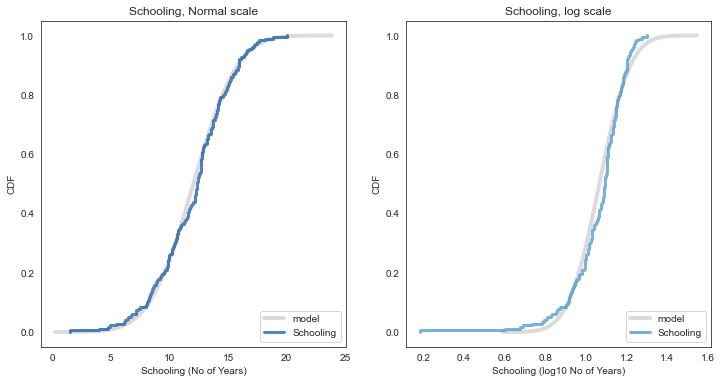

In [31]:
thinkplot.PrePlot(2,1,2)

MakeNormalModel(sch)
thinkplot.Config(
    title="Schooling, Normal scale",
    xlabel="Schooling (No of Years)",
    ylabel="CDF",
    loc="lower right",
)

thinkplot.SubPlot(2)

log_sch = np.log10(sch)
MakeNormalModel(log_sch)
thinkplot.Config(
    title="Schooling, log scale",
    xlabel="Schooling (log10 No of Years)",
    ylabel="CDF",
    loc="lower right",
)

# The distribution is Normal.

In [32]:
#Create a normal distribution. Because we have stated "it is normal", we only need mean and std to define it. 
norm = ss.norm(loc=sch.mean(), scale=sch.std())
#Print some stats... Note mean and median. 
norm.median(), norm.mean()

(12.027738764044939, 12.027738764044939)

c:\Users\toluw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\toluw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


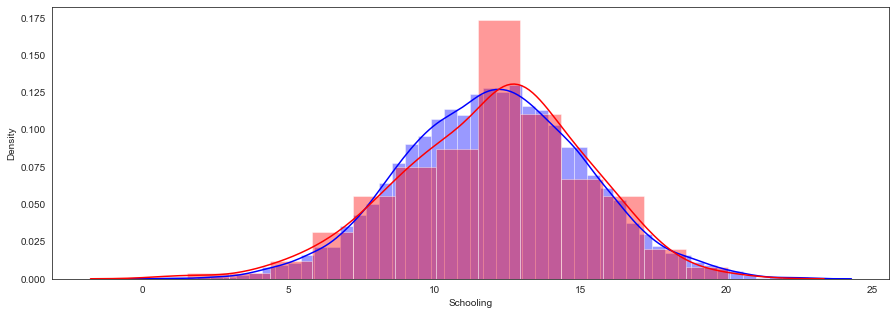

In [33]:
#Create a histogram - We will take our new distribution and create some random values mirroring that
sns.distplot(norm.rvs(size=10000), color="blue", label="Analytical Distribution")
sns.distplot(sch, color="red", label="Empirical Distribution")
plt.show()


I will use the CDF to look up the percentile rank of a particular value. (Canada global Schooling Rank ). 

In [34]:
Schooling_cdf = thinkstats2.Cdf(df.Schooling.dropna(), label='Schooling')

In [35]:
df.loc['Canada'] # value of Schooling for Canada is 15.9

isDeveloped         1.000000e+00
Lifeexpectancy      8.168750e+01
AdultMortality      6.462500e+01
infantdeaths        2.000000e+00
Alcohol             8.053333e+00
HepatitisB          2.884615e+01
Measles             1.295000e+02
BMI                 5.586250e+01
under-fivedeaths    2.000000e+00
Polio               8.531250e+01
Diphtheria          9.106250e+01
GDP                 3.384881e+11
Population          1.136405e+07
Schooling           1.587500e+01
GDP_per_capita      2.978586e+04
Name: Canada, dtype: float64

In [36]:
Schooling_cdf.PercentileRank(15.9)

# Canada Schooling is ranked near the 90th percentile.

89.8876404494382

### Part 3: Create another analytical distribution for GDP per Capita (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing it alongside the emperical. You have free reign on how. 
<li>5 points are for using the analytical distribution to evaluate the quality of your GDP per capita metric - does it appear accurate? Why or why not?
<li>If you've judged GDP per cap to be unreliable, drop it. 
</ul>

In [37]:
#Analytical for GDP/capita

In [38]:
gddpc = df.GDP_per_capita.dropna()

n, mean, std 144 6536.845774647888 10454.744593946047
n, mean, std 144 3.3886646990701896 0.6200693590394721


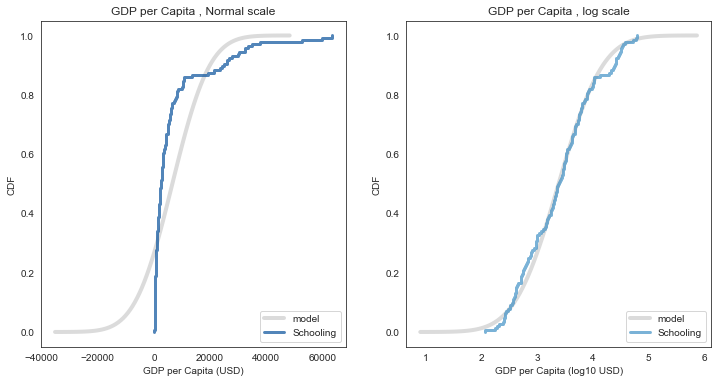

In [39]:
thinkplot.PrePlot(2,1,2)

MakeNormalModel(gddpc)
thinkplot.Config(
    title="GDP per Capita , Normal scale",
    xlabel="GDP per Capita (USD)",
    ylabel="CDF",
    loc="lower right",
)

thinkplot.SubPlot(2)

log_gddpc = np.log10(gddpc)
MakeNormalModel(log_gddpc)
thinkplot.Config(
    title="GDP per Capita , log scale",
    xlabel="GDP per Capita (log10 USD)",
    ylabel="CDF",
    loc="lower right",
)

In [40]:
def MakeNormalPlot(gddpc):
    """Generates a normal probability gddpc.

    gddpc: sequence
    """
    mean, var = thinkstats2.TrimmedMeanVar(gddpc, p=0.01)
    std = np.sqrt(var)

    xs = [-5, 5]
    xs, ys = thinkstats2.FitLine(xs, mean, std)
    thinkplot.Plot(xs, ys, color="0.8", label="model")

    xs, ys = thinkstats2.NormalProbability(gddpc)
    thinkplot.Plot(xs, ys, label="gddpc")

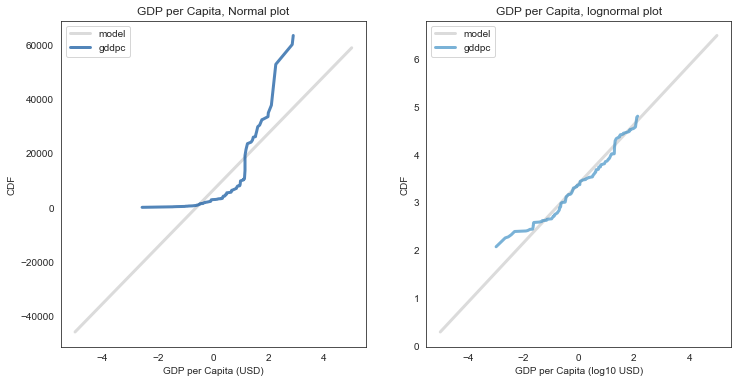

In [41]:
thinkplot.PrePlot(2,1,2)

MakeNormalPlot(gddpc)
thinkplot.Config(
    title="GDP per Capita, Normal plot",
    xlabel="GDP per Capita (USD)",
    ylabel="CDF",
    loc="upper left",
)

thinkplot.SubPlot(2)

MakeNormalPlot(log_gddpc)
thinkplot.Config(
    title="GDP per Capita, lognormal plot",
    xlabel="GDP per Capita (log10 USD)",
    ylabel="CDF",
    loc="upper left",
)

# The distribution is LogNormal.

In [42]:
#Create a normal distribution. Because we have stated "it is lognormal", we only need mean and std to define it. 
norm = ss.norm(loc=log_gddpc.mean(), scale=log_gddpc.std())
#Print some stats... Note mean and median. 
norm.median(), norm.mean()

(3.3893192771407556, 3.3893192771407556)

c:\Users\toluw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\toluw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


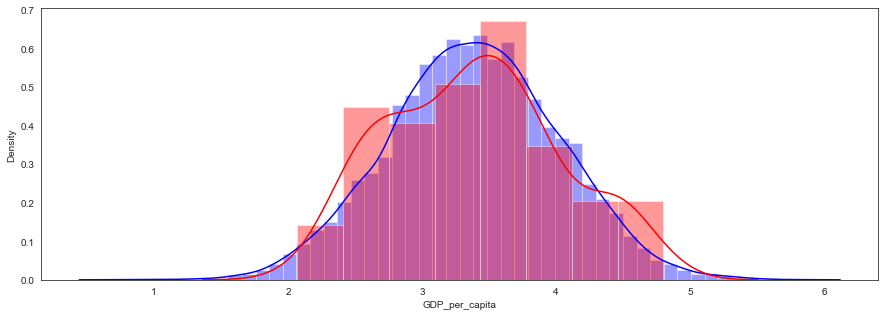

In [43]:
#Create a histogram - We will take our new distribution and create some random values mirroring that
sns.distplot(norm.rvs(size=10000), color="blue")
sns.distplot(log_gddpc, color="red")
plt.show()


In [44]:
gddpc = np.power(10, log_gddpc) # what's the data look like before log10
gddpc

Country
Australia      63337.61
Switzerland    60013.03
Luxembourg     52725.13
Netherlands    37660.65
Austria        34897.08
                 ...   
Liberia          245.41
Senegal          209.41
Guinea           189.11
Eritrea          180.15
Burundi          117.47
Name: GDP_per_capita, Length: 144, dtype: float64

### Part 4: Visually identify correlations. Separate developed and not developed countries is some way. (15pts)

<ul>
<li>5 points are for effectively and clearly showing the visualizations used to evaluate correlations.
<li>10 points are for, in the process of visualizing, remove outliers that confound correlations. List outlier "filters" you used and justify why - was the data an error, a real value that is just way out of line, or somethingn else? Remember, you're trying to find things that have correlations with each other. Looking at a correlation between home size and income may not benefit from Jeff Bezos being included. It may be helpful to look at the results and revise. 
</ul>

In [45]:
#Visualize correlations. 

In [46]:
df2.describe() # data of of developed countries only

,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDP_per_capita
count,38.0,38.000000,38.000000,38.000000,38.000000,29.000000,38.000000,38.000000,38.000000,38.000000,38.000000,3.800000e+01,3.200000e+01,35.000000,32.000000
mean,1.0,79.379276,80.509868,1.417763,9.618834,83.516697,498.143092,52.321546,1.705592,93.690789,93.641447,1.431315e+11,6.949693e+06,15.890714,23122.894688
std,0.0,3.140797,32.534667,4.266490,2.542922,17.109567,1233.447144,7.384868,5.006898,4.440484,5.478106,2.410893e+11,9.807170e+06,1.514916,15504.331228
min,1.0,72.806250,49.375000,0.000000,1.762500,28.846154,0.000000,25.606250,0.000000,82.125000,70.625000,0.000000e+00,2.786288e+04,13.518750,4820.880000
25%,1.0,77.092187,60.968750,0.000000,8.635333,80.538462,6.125000,51.339062,0.000000,90.171875,90.171875,3.244069e+09,9.721312e+05,15.046875,10278.162500
50%,1.0,80.746875,68.218750,0.000000,10.089667,88.937500,62.343750,53.425000,0.062500,95.125000,95.000000,2.120831e+10,3.188562e+06,15.900000,23820.865000
75%,1.0,81.635937,75.734375,1.468750,11.353312,94.750000,232.578125,55.862500,1.750000,96.796875,97.234375,1.661514e+11,7.157746e+06,16.693750,30863.997500
max,1.0,82.537500,169.687500,26.187500,13.026000,98.562500,6875.812500,66.181250,30.750000,98.937500,99.000000,1.004677e+12,3.875735e+07,20.037500,63337.610000


In [47]:
df1.describe() # data of of developing countries only

,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDP_per_capita
count,153.0,145.000000,145.000000,153.000000,151.000000,153.000000,153.000000,149.000000,153.000000,153.000000,153.000000,1.530000e+02,1.120000e+02,143.000000,112.000000
mean,0.0,66.563793,186.885345,36.017565,3.195285,78.486141,2780.184232,35.749581,50.026144,80.136123,79.893557,2.125314e+10,1.428809e+07,11.082255,2247.808482
std,0.0,8.353741,95.157574,126.146948,2.975724,17.414734,8779.235067,17.347144,171.146279,16.595979,17.100002,6.468705e+10,4.299802e+07,2.624567,2064.331882
min,0.0,46.112500,18.750000,0.000000,0.010000,9.000000,0.000000,5.200000,0.000000,29.812500,26.812500,0.000000e+00,2.920000e+02,1.531250,117.470000
25%,0.0,59.868750,125.000000,0.562500,0.594333,67.153846,2.000000,18.687500,0.937500,69.000000,70.187500,0.000000e+00,9.623203e+05,9.556250,549.620000
50%,0.0,69.081250,161.187500,5.062500,2.267333,81.285714,266.687500,37.731250,7.187500,83.375000,83.500000,1.521684e+09,3.743167e+06,11.612500,1620.410000
75%,0.0,73.506250,240.312500,27.562500,4.916375,94.437500,1943.875000,48.962500,38.125000,95.500000,95.187500,8.382415e+09,1.131283e+07,12.800000,3260.017500
max,0.0,80.487500,550.062500,1366.687500,13.497333,99.000000,65857.937500,87.300000,1812.500000,99.000000,99.000000,5.241280e+11,4.214677e+08,16.506250,8566.580000


In [48]:
dfp = pd.concat([df2, df1], ignore_index=True) # appending the two dataframe. why? because I have applied 
# transformation the dataframes. I have remeoved some countries from developing to developed

In [49]:
#Cut down data to only numeric values, and fliter out some outliers. 
dfp = dfp[["Lifeexpectancy","AdultMortality", "Alcohol", "Schooling","GDP","Population","GDP_per_capita", "isDeveloped"]]

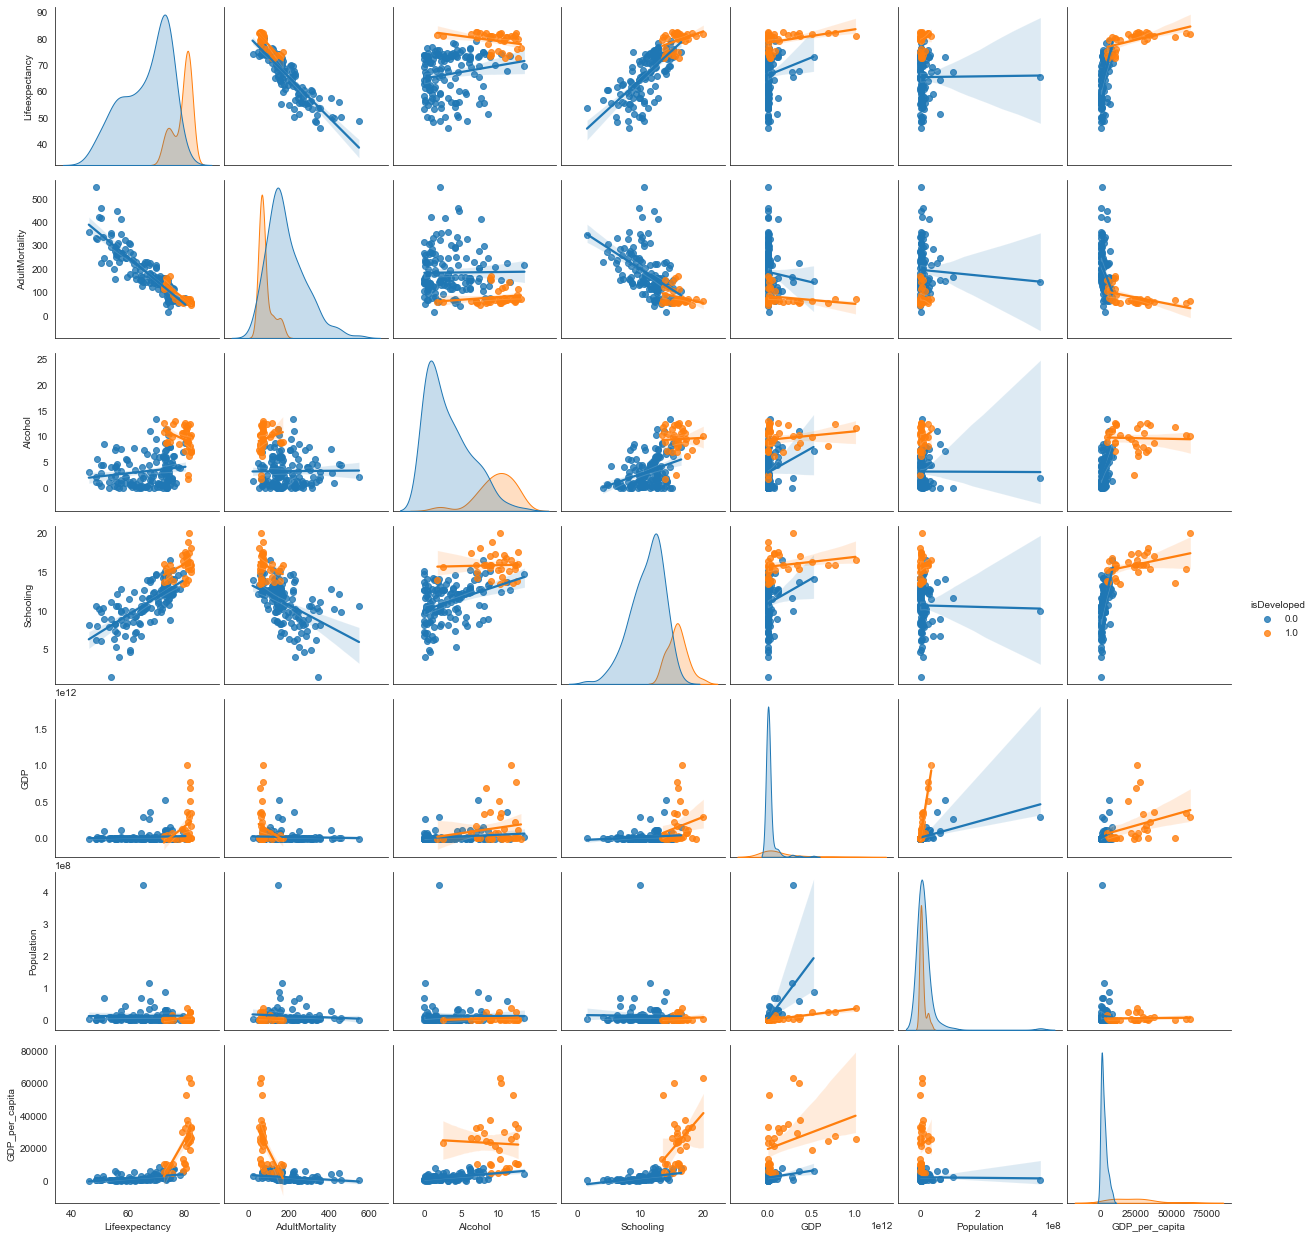

In [50]:
sns.set_style('white')
#Generate pairplot
# I think it is clearer if I look at the different groups individually not this!!!!!!!!
sns.pairplot(dfp, dropna=True, hue="isDeveloped",kind="reg")
plt.show()

In [51]:
#Create correlation dataframe
df = df.dropna()
dfCor = df.corr()
dfCor.head()

,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDP_per_capita
isDeveloped,1.000000,0.562498,-0.437272,-0.123344,0.689932,0.141886,-0.123230,0.500773,-0.126637,0.394612,0.383716,0.435000,-0.058194,0.628599,0.753117
Lifeexpectancy,0.562498,1.000000,-0.877687,-0.163580,0.456047,0.333752,-0.158951,0.754873,-0.190052,0.640548,0.636588,0.364237,-0.023562,0.782516,0.563015
AdultMortality,-0.437272,-0.877687,1.000000,0.052508,-0.276433,-0.190935,0.045912,-0.614093,0.072298,-0.443953,-0.417253,-0.271712,-0.023573,-0.554374,-0.433079
infantdeaths,-0.123344,-0.163580,0.052508,1.000000,-0.108648,-0.298115,0.730379,-0.281420,0.996922,-0.224021,-0.216586,0.122075,0.905898,-0.198182,-0.120828
Alcohol,0.689932,0.456047,-0.276433,-0.108648,1.000000,0.164300,-0.055363,0.504825,-0.104216,0.399188,0.379951,0.407959,-0.038389,0.672403,0.587029


# The correlation is better visualised differently.  Developed (df2) and Developing(df1)

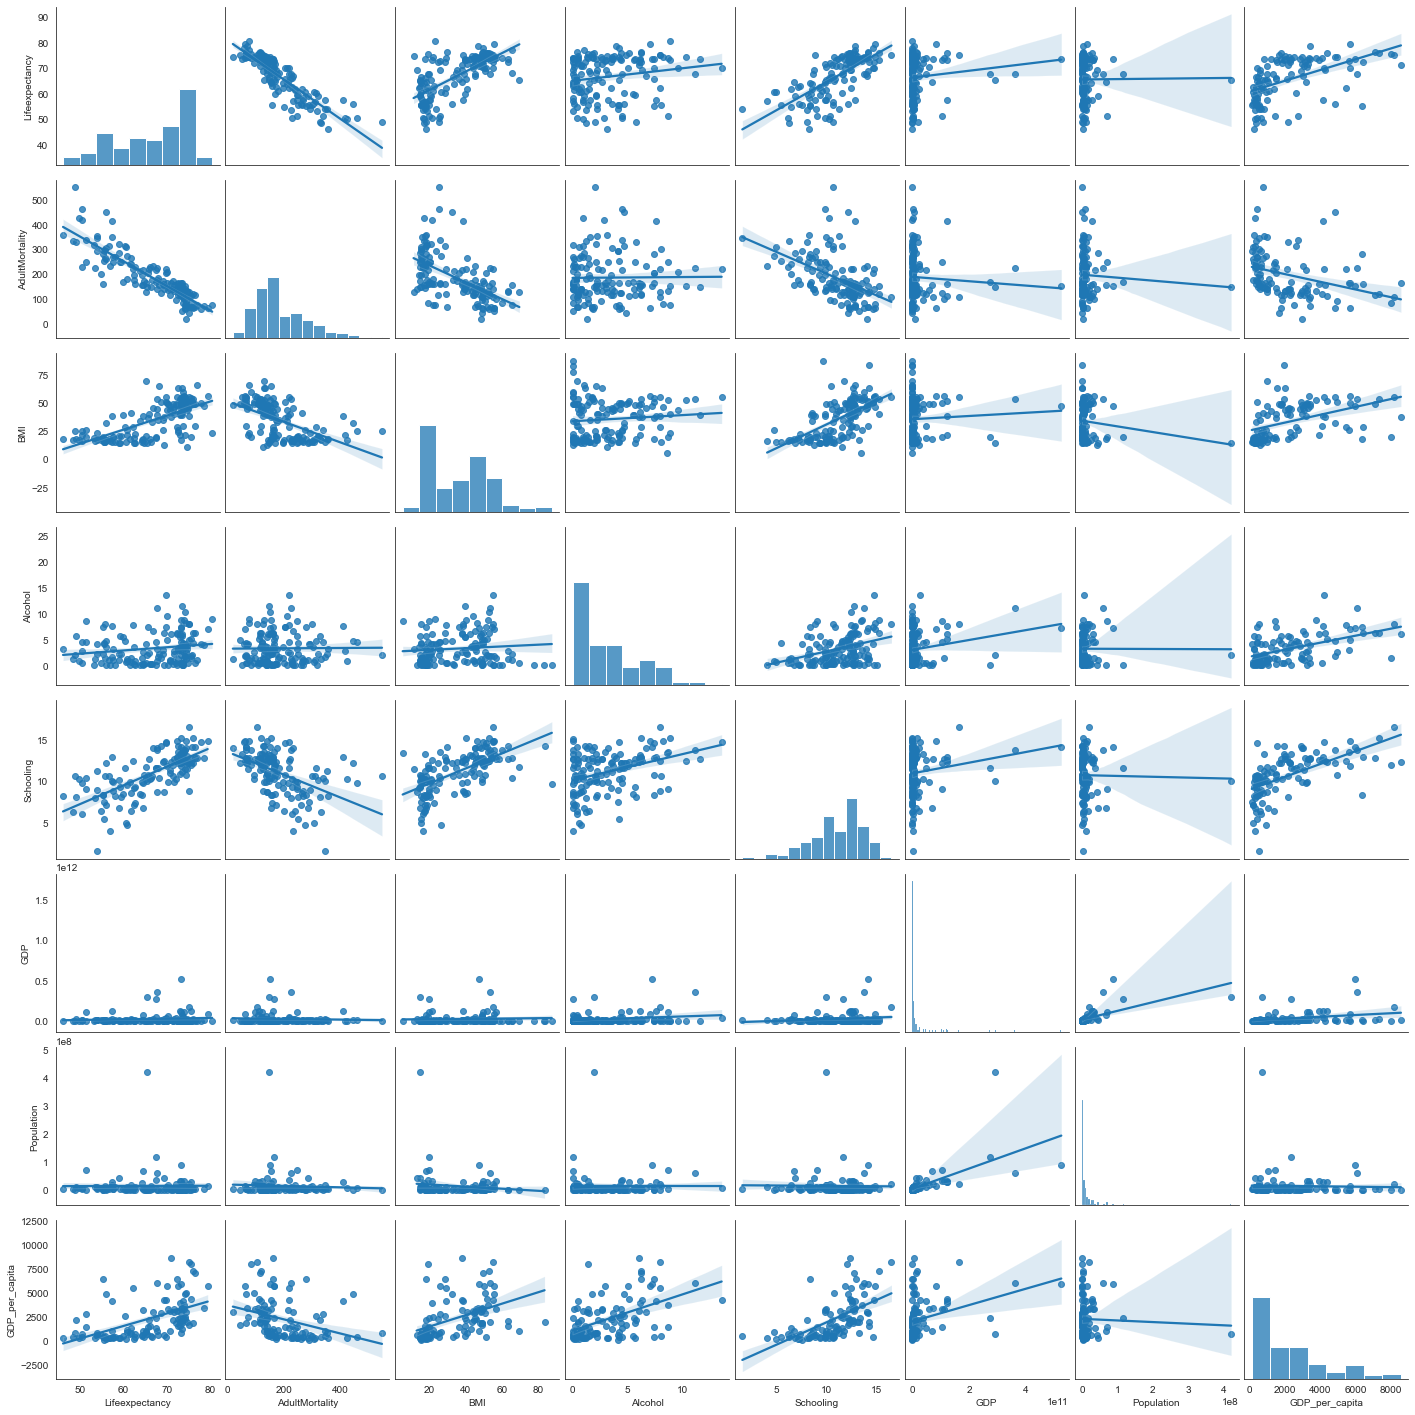

In [52]:
# DEVELOPING COUNTRIES


df1p = df1[["Lifeexpectancy","AdultMortality",'BMI', "Alcohol", "Schooling","GDP","Population","GDP_per_capita", "isDeveloped"]]
sns.set_style('white')
#Generate pairplot
sns.pairplot(df1p.drop(columns="isDeveloped"), dropna=True, kind="reg")
plt.show()

In [53]:
#Create correlation dataframe
df1Cor = df1.corr()
df1Cor.head()

,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDP_per_capita
isDeveloped,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lifeexpectancy,NaN,1.000000,-0.872213,-0.158367,0.174401,0.507660,-0.166551,0.671211,-0.188127,0.636584,0.638052,0.106787,0.007483,0.703429,0.525454
AdultMortality,NaN,-0.872213,1.000000,0.048137,0.010405,-0.347327,0.051103,-0.552638,0.069356,-0.456888,-0.437866,-0.061407,-0.054650,-0.488000,-0.336540
infantdeaths,NaN,-0.158367,0.048137,1.000000,-0.042693,-0.319228,0.709596,-0.253461,0.996928,-0.218161,-0.219212,0.393805,0.912893,-0.171103,-0.149296
Alcohol,NaN,0.174401,0.010405,-0.042693,1.000000,0.083113,0.004393,0.095802,-0.035136,0.158486,0.133327,0.208935,-0.003860,0.371978,0.505749


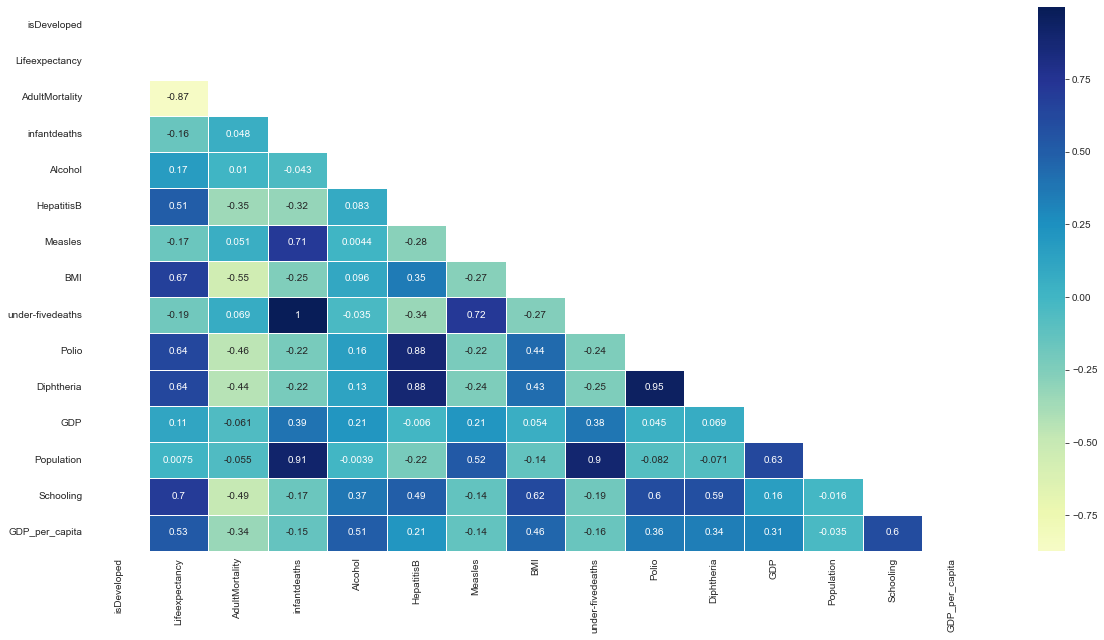

In [54]:
#Plot correlation matrix
plt.rcParams["figure.figsize"] = (20,10)
mask = np.triu(np.ones_like(df1Cor, dtype=bool))
sns.heatmap(df1Cor, center=0, linewidths=.5, annot=True, cmap="YlGnBu", yticklabels=True, mask=mask)
plt.show()

In [55]:
# Developing countries shows high postive correlation between Life expectancy and schooling, 
# Life expecatancy and GDP per Capita 
# it shows a positive correaltion between Life expecatancy and (Polio, BMI, Diphtheria and Hepatitis B)

# Correlation does not mean causality

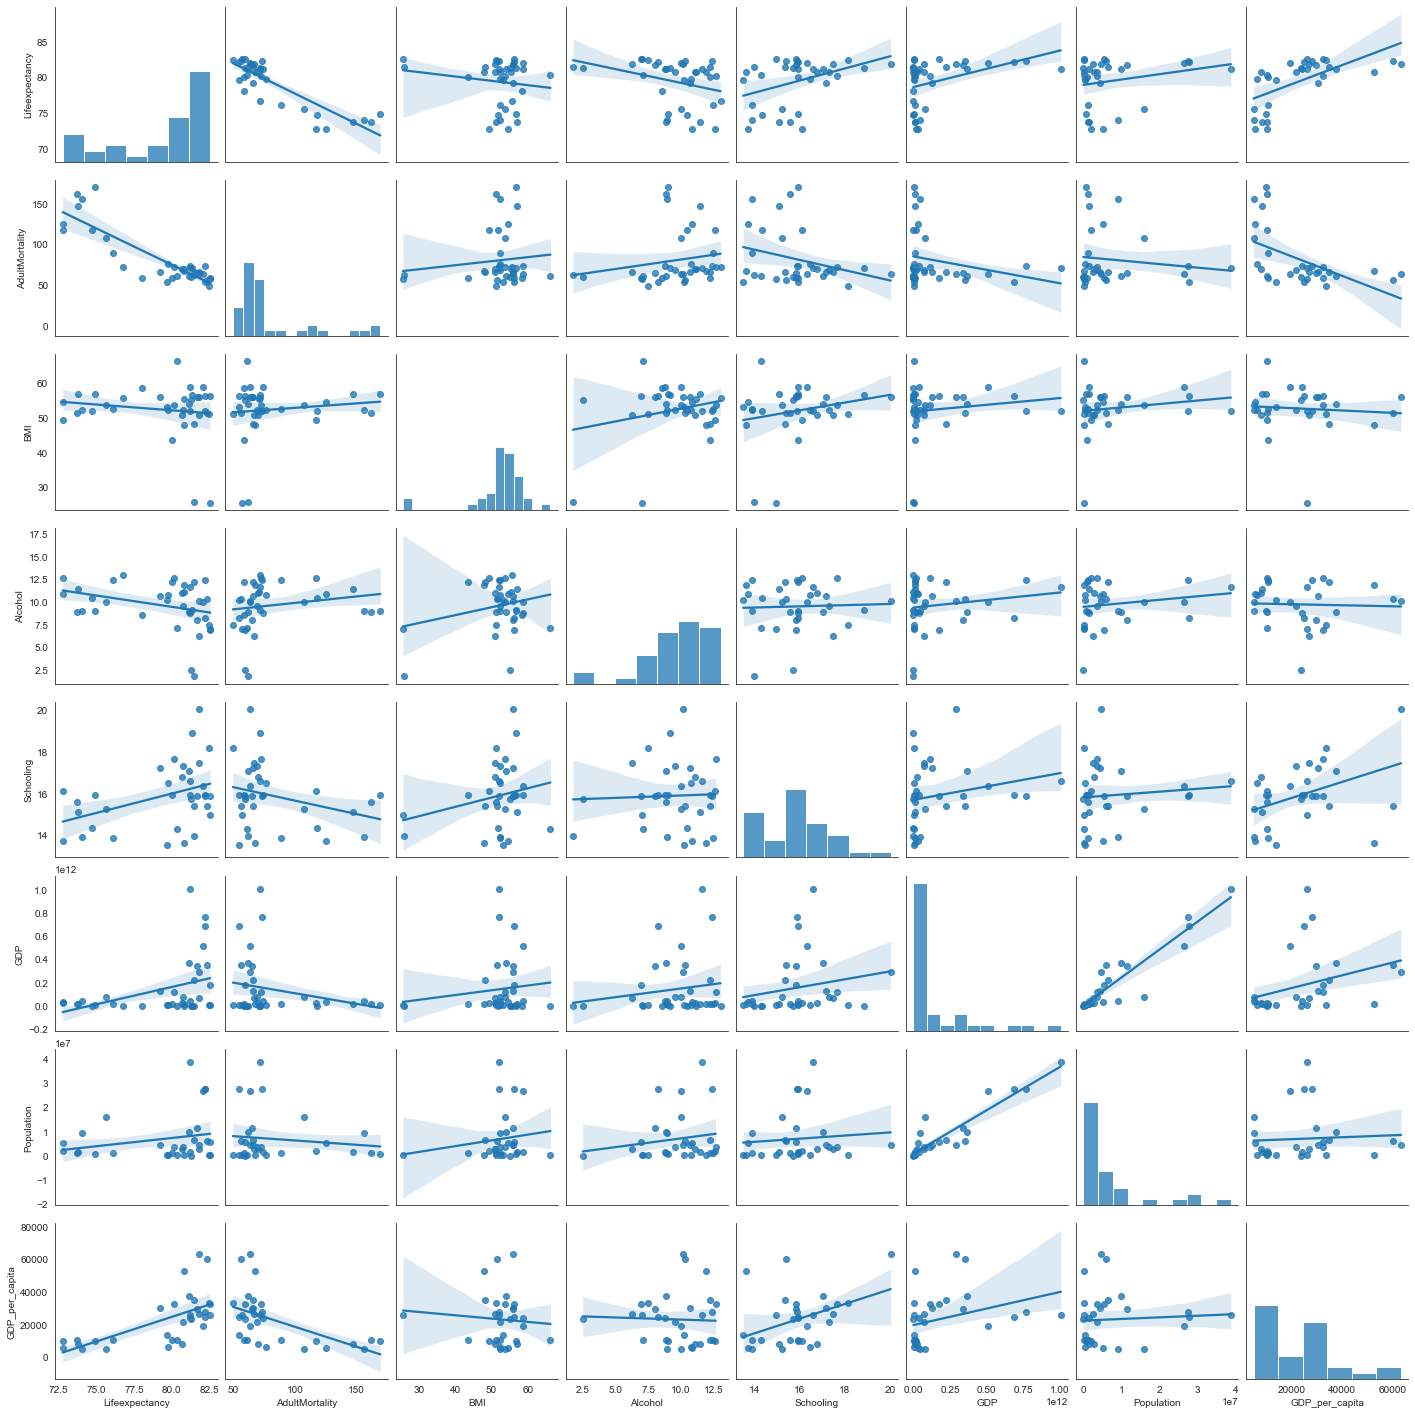

In [56]:
# DEVELOPED COUNTRIES

df2p = df2[["Lifeexpectancy","AdultMortality",'BMI', "Alcohol", "Schooling","GDP","Population","GDP_per_capita", "isDeveloped"]]
#Generate pairplot
sns.pairplot(df2p.drop(columns="isDeveloped"), dropna=True, kind="reg")
plt.show()

In [57]:
#Create correlation dataframe
df2Cor = df2.corr()
df2Cor.head()

,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDP_per_capita
isDeveloped,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lifeexpectancy,NaN,1.000000,-0.865808,-0.037707,-0.310483,-0.437878,0.175292,-0.142398,-0.034917,-0.103474,-0.251607,0.390712,0.225324,0.396064,0.633417
AdultMortality,NaN,-0.865808,1.000000,-0.108275,0.181625,0.262391,-0.079160,0.112524,-0.109486,0.174879,0.178693,-0.244341,-0.124136,-0.283780,-0.538102
infantdeaths,NaN,-0.037707,-0.108275,1.000000,-0.065097,-0.079939,0.109476,0.113684,0.999292,-0.397668,0.071786,0.025059,0.688634,-0.078606,-0.057495
Alcohol,NaN,-0.310483,0.181625,-0.065097,1.000000,0.037324,-0.073798,0.253402,-0.061127,0.028721,0.116295,0.157804,0.167286,0.038783,-0.038217


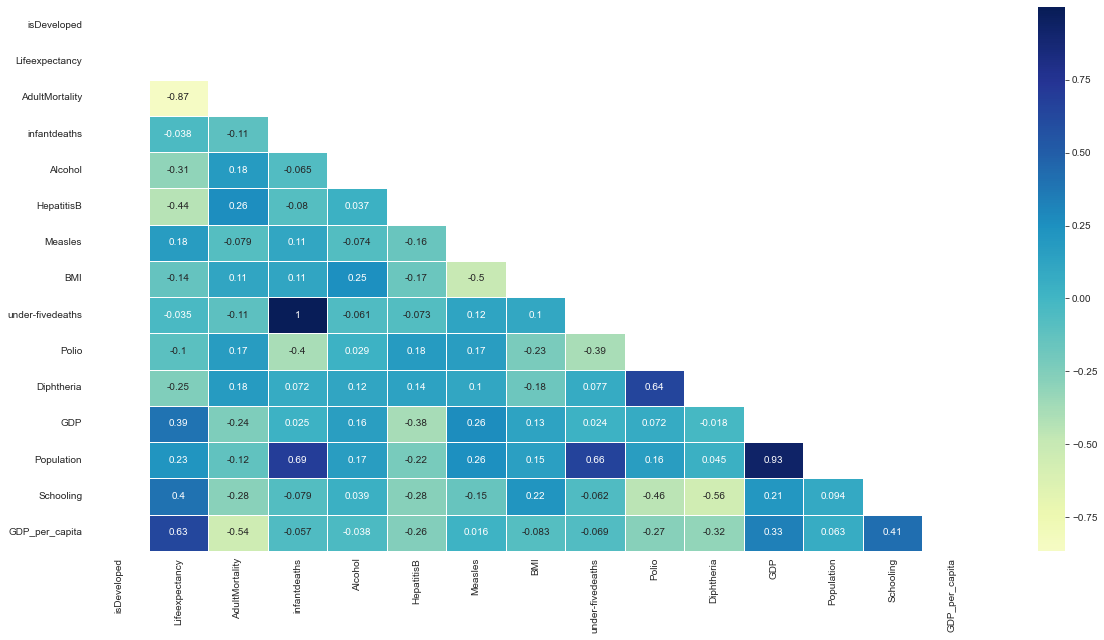

In [58]:
#Plot correlation matrix
plt.rcParams["figure.figsize"] = (20,10)
mask = np.triu(np.ones_like(df2Cor, dtype=bool))
sns.heatmap(df2Cor, center=0, linewidths=.5, annot=True, cmap="YlGnBu", yticklabels=True, mask=mask)
plt.show()

In [59]:
# Developed countries shows high postive correlation between Life expectancy and GDP per Capita , 
# Life expecatancy and maybe schooling
# it shows a positive correaltion between Life expecatancy and (Polio, BMI, Diphtheria and Hepatitis B)

# Correlation does not mean causality

### Part 5: Calculate correlations (25pts)

<ul>
<li>5 points are for identifying and calculating 3 strongest correlations with life expectancy for each of developed and not developed. 
<li>10 points are for analyzing those correlations. Do they appear to be supported by reality? Do you have reason to beleive any are causal?
<li>10 points are for identifying 2 places where developing and developed countries have a substantially different relationship with respect to life expectancy, and theorizing why. What would be needed to confirm your thoughts?
</ul>

<b>Please put your written parts in markdown cells, with a little formatting to make them readable. 

In [60]:
#Calculate correlations and analyze. 

Life Expectancy for each of developed and not developed.

Idea of chart from : https://www.linkedin.com/pulse/data-visualization-life-expectancy-vs-gdp-per-capita-morgavi/

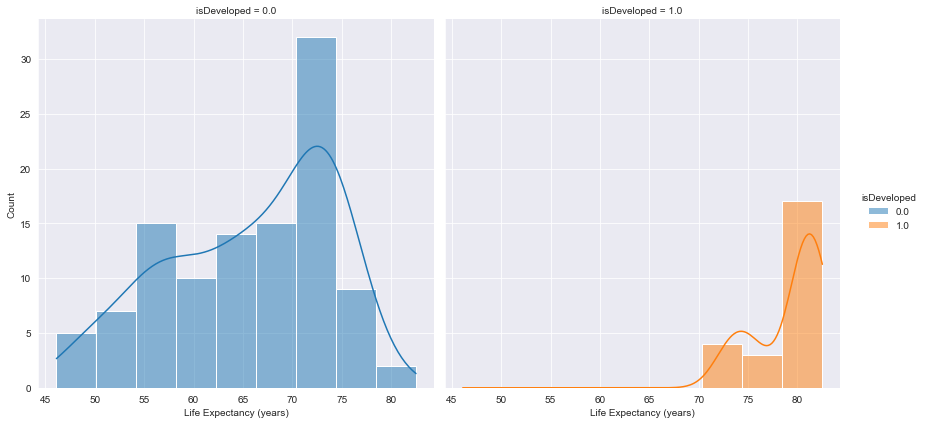

In [61]:
sns.set_style('darkgrid')


#Life Expectancy across group Developed= 1.0 and Developing = 0.0

plot = sns.displot(data=df.dropna(), x='Lifeexpectancy',
 kde=True, hue='isDeveloped', col='isDeveloped', height=6, aspect=1)
sns.despine()


#Set Axis Labels
plot.set_axis_labels("Life Expectancy (years)", "Count")

In [62]:
# Mean life expectancy for the two groups

print('Mean of Life Expectancy of Developing Countries:', df1.Lifeexpectancy.dropna().mean())
print('Mean of Life Expectancy of Developed Countries:', df2.Lifeexpectancy.dropna().mean())

Mean of Life Expectancy of Developing Countries: 66.56379310344829
Mean of Life Expectancy of Developed Countries: 79.37927631578947


In [63]:
# Cohen's EffectSize

CohenEffectSize(df2.Lifeexpectancy.dropna(), df1.Lifeexpectancy.dropna())

1.6923752424849858

In [64]:
# Cohen’s Effectsize The average Life expectancy of 'Developed Countries' df2 is 
# 1.6924  standard deviations greater than the average Life expectancy of 'Developing Countries'  df1.

# Using the rule of thumb interpretation, I would interpret this to be a large effect size.

# In other words, there is a statistically significant difference in the mean Life expectancy between groups, 
# the actual difference between the group means is large.

# More Visualization of the correlation using scatter plot

In [65]:
# It confirms that developed countries have higer life expectancy as a result of purchasing power parity  measured
# by GDP per capita. Purchasing Power Parity (PPP) allows us to compare living standards of countries

# People in developed countries tend to live more than 79 becaues of  higher 
# PPP compare to developing countries that tend to live up 66 years with lower PPP

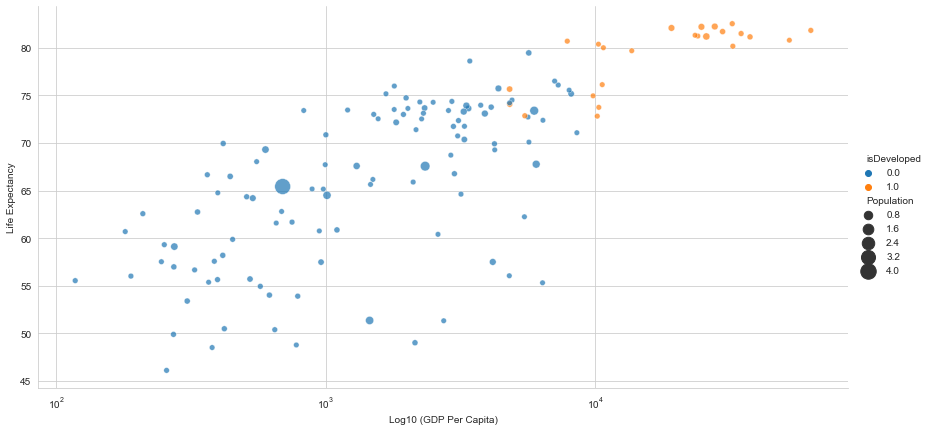

In [66]:
sns.set_style('whitegrid')
plot = sns.relplot(data=df, x='GDP_per_capita', y='Lifeexpectancy', hue='isDeveloped', size='Population', alpha=0.7,
 edgecolors="grey", linewidth=0.5, sizes=(30, 250), height=6, aspect=2).set(xscale="log")
plot.set_axis_labels("Log10 (GDP Per Capita)", "Life Expectancy")

In [67]:
# It confirms that developed countries have higer life expectancy as a result of knowlegde acquired through years of schooling

# People in developed countries tend to live more than 79 becaues of  higher 
# Education compare to developing countries that tend to live up 66 years with lower eductaion.

# I have calculated the Cohen's Effect Size earlier and there is a large signifcant difference among the two groups

# NOTE: correlation is not causalityy

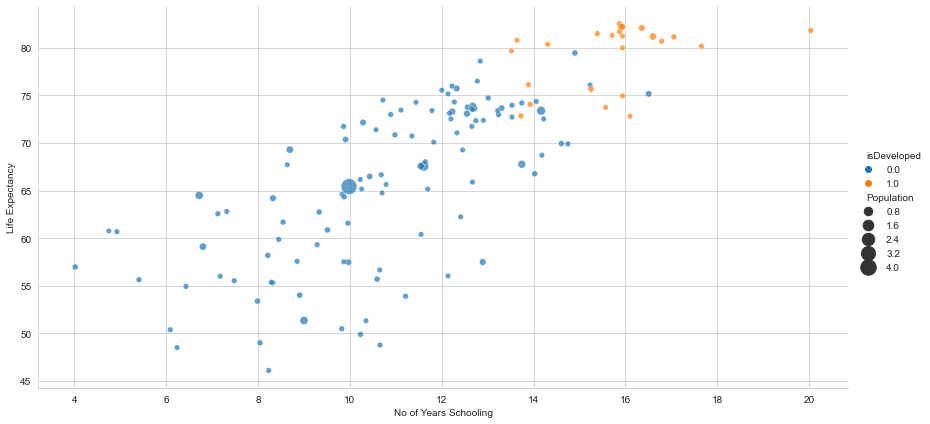

In [68]:
sns.set_style('whitegrid')
plot = sns.relplot(data=df, x='Schooling', y='Lifeexpectancy', hue='isDeveloped', size='Population',
 alpha=0.7, edgecolors="grey", linewidth=0.5, sizes=(30, 250), height=6, aspect=2)
plot.set_axis_labels("No of Years Schooling", "Life Expectancy")

In [69]:

# BMI has a positive correlation with Life expectancy in developed countries unlike developing countries that show negative positive
# correlation

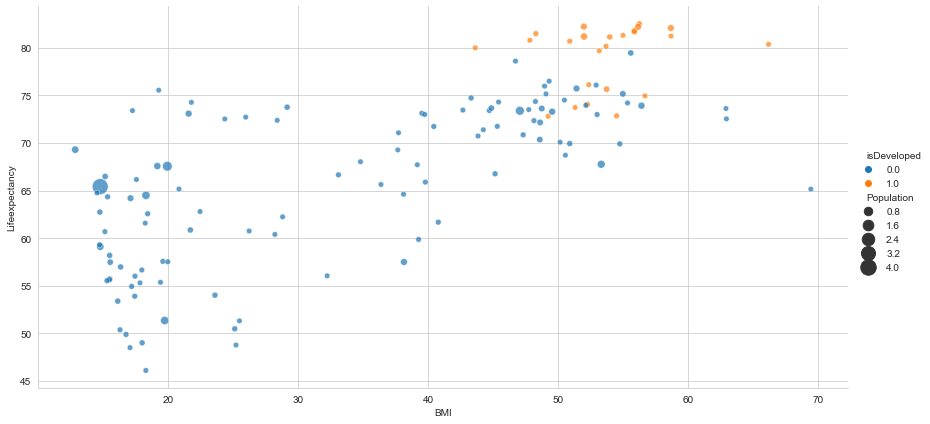

In [73]:
sns.set_style('whitegrid')
plot = sns.relplot(data=df, x='BMI', y='Lifeexpectancy', hue='isDeveloped', 
size='Population', alpha=0.7, edgecolors="grey", linewidth=0.5, sizes=(30, 250), height=6, aspect=2)
plot.set_axis_labels("BMI", "Lifeexpectancy")

https://towardsdatascience.com/master-a-third-of-seaborn-statistical-plotting-with-relplot-df8642718f0f

In [71]:
# Both polio and infant death do not show any significant correlation with life expectancy.

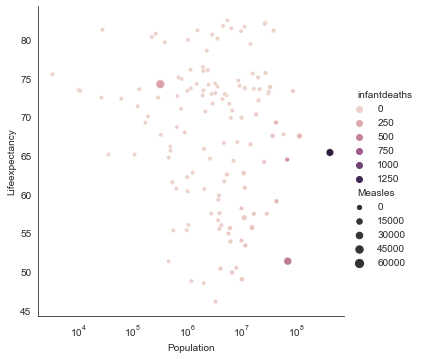

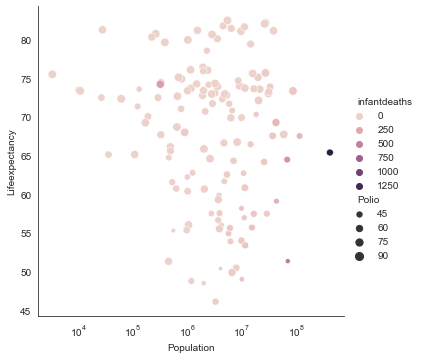

In [72]:
sns.set_style('white')
sns.relplot(x='Population',
            y='Lifeexpectancy',
            data=df,
            kind='scatter',
            size='Measles',
            hue='infantdeaths').set(xscale="log")

sns.set_style('white')
sns.relplot(x='Population',
            y='Lifeexpectancy',
            data=df,
            kind='scatter',
            size='Polio',
            hue='infantdeaths').set(xscale="log")